## Analyze A/B Test Results

This project aim is to master the subjects covered in the statistics lessons.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)


<a id='intro'></a>
### Introduction
A/B tests are very commonly performed by data analysts and data scientists.  It is important to get some practice working with the difficulties of these.<br/>
For this project, we will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. The goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.




**The corresponding quiz questions in the classroom is answered according to the work in this notebook.** The labels for each classroom concept are provided for each question.  This will assure we are on the right track as we work through the project.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#To check 'group' and 'landing_page' unique value
df['group'].unique() , df['landing_page'].unique()

(array(['control', 'treatment'], dtype=object),
 array(['old_page', 'new_page'], dtype=object))

There're only two unique values in `group` column: [`treatment` and `control`] and two unique values in `landing_page` column: [`new_page` and `old_page`] <br/><br/> Now, we run a query that return the number of records that don't have new_page and treatment at the same row.

In [7]:
mismatch = df.query("group == 'treatment' and landing_page == 'old_page' or group == 'control' and landing_page == 'new_page'")
mismatch.shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are `294478` rows and `294478` non-null values which means there are 0 null values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df.to_csv('ab_data2.csv', index=False)

In [10]:
df2=pd.read_csv('ab_data2.csv')

In [11]:
query="group == 'treatment' and landing_page == 'old_page' or group == 'control' and landing_page == 'new_page'"
df2.drop(df2.query(query).index, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2['user_id'].duplicated(keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates('user_id',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2['landing_page'].shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:** <br/>
The probability of individual converting regardless of the page they converted to is 11.96%. The probabilities of the converted individual being from control group and treatment group are 12.04% (0.1204) and 11.88% (0.1188), respectively, which are very close to the probability of the conversion regardless of the group. However, we notice that the old page is slightly better. **There's no clear and significant evidence that new treatment page leads to more conversions (i.e. the values are very close, further testing is needed)**. Also, the probability that an individual received the new page is 50.01%. 


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 **Answer:**
 <br/>
 **$H_{0}$**: **$p_{old}$** ≥ **$p_{new}$** 
 <br/>
 **$H_{1}$**: **$p_{old}$** < **$p_{new}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
#the number of individuals in the treatment group
n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
#the number of individuals in the control group
n_old = df2[df2['group'] == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.mean() - old_page_converted.mean()

-0.0027650352415529156

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new])
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])
    diffs = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diffs)

In [29]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

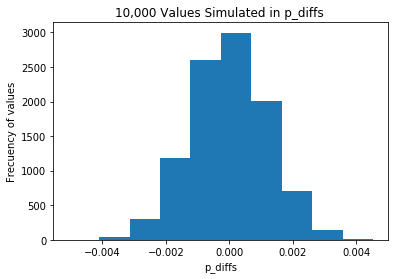

In [30]:
plt.hist(p_diffs); #Here is the sampling distribution of the difference under the null
plt.xlabel('p_diffs')
plt.ylabel('Frecuency of values')
plt.title('10,000 Values Simulated in p_diffs ');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
#The actual difference 
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
act_diff

-0.0015782389853555567

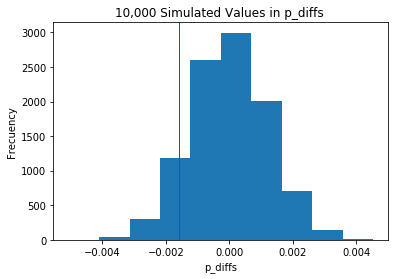

In [32]:
plt.hist(p_diffs); #The distribution of the difference under the null with the actual difference
plt.axvline(act_diff, color = 'r', linewidth = 1)
plt.xlabel('p_diffs')
plt.ylabel('Frecuency')
plt.title('10,000 Simulated Values in p_diffs ');

In [33]:
#The proportion of the simulated p_diffs and act-diff 
(p_diffs > act_diff).mean()

0.9044

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**<br/>
We computed the p_value which is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true [1-3]. The calculated p-value exceeds 0.05 , therfore, we would not reject the null hypothesis. Having p-value of 0.90 is considered large and it entails that the null hypothesis is true and observing the data from the null is possible. Which suggests that the old page is similar or better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm
convert_old = df2[df2['group'] == 'control']['converted'].sum()
convert_new = df2[df2['group'] == 'treatment']['converted'].sum()
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
 
convert_old, convert_new, n_old , n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new],alternative='smaller')
print("z_score = ",z_score, "\t p_value =", p_value)

z_score =  1.3109241984234394 	 p_value = 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** <br/>
The z-score test value is 1.31 and the p-value is 0.91. The p-value is slightly similar to the findings in **j.** and **k.**, It is a significant value and higher probability of null hypothesis. This means we failed to reject the null hypothesis in favor of the alternative which state that the new page is better than the old page.  <br/> 
We'll accpet the null since we have a stistical evidence that the old page is equal to or better than the new page. This agrees with the findings in **j.** and **k.**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** <br/>
Since it is used to predict 2 possible outcomes and the result of the conversion is binary 0,1. 
The type of regression we sould use is `Logistic Regression`[4].

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [37]:
df2 = df2.drop('control', axis = 1)
df2 = df2.rename(columns={'treatment': 'ab_page'})
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
import statsmodels.api as sm

In [39]:
logit_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        01:26:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:** <br/>
$H_{0}$: $P_{new}$ = $P_{old}$  <br/>
$H_{1}$: $P_{new}$ ≠ $P_{old}$  <br/>
We notice that p-value = 0.19, the value of ab_page, differed from the value in **Part II** because the test has changed and the hypothesis has differed. (one-sided test in **Part II** and then we added intercept in **Part III** two-sided test) [3].

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** <br/>
• Adding more terms and considering more factors is good because it may lead to more accurate and precise understanding of the association of each individual factor with the outcome.<br/>
• There are disadvantages of this approach. First, a linear relationship may not exist between your response and predictor variables. Second, it might have correlated errors. Third, it might not have constant variance of your errors. Fourth, you might have outliers or leverage points that hurt your model. Or last, you might have more linearity.[5]<br/><br/>
Here, we should consider more factors in our regression it might influence the outcome. For example, in this regression model, we can consider their age, gender, country, the time and the browser they tested the page on, these factors may effect the conversion rate. However, when we add metrics that are correlated with each other not with the response this is called `multicollinearity`.  When multicollinearity is present this may lead to, (1) The expected relationships between your x-variables and the response may not hold and (2) Our hypothesis testing results may not be reliable [6].    

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
df3 = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [43]:
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [44]:
df3['intercept'] = 1
df3[['UK', 'US']] = pd.get_dummies(df3['country'])[['UK','US']] #since there're 3 

In [45]:
logit_model = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        01:26:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**Answer:** <br/>
The p-values asocciated with UK (0.07) and US (0.13) are both over the 0.05 (not a significant value of 0.95). Still, this fails to reject the null which means `the countries do not effect the conversion rate`. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
logit_model = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US', 'ab_page']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        01:26:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**Answer:**<br/>
We previously added the ap_page column (the converted treatment group) and we also added UK and US in **g**. <br/>From the result summary the p-values of `UK, US and ab_page` (0.07, 0.13 and 0.19 respectively) are more than 0.05 and less than 0.95. This also fails to reject the null entailing that the country and page interaction do not have a significant effect on the conversion. 

<a id='conclusions'></a>
## Conclusion

A/B tests are very commonly performed by data analysts and data scientists. It is important to get some practice working with the difficulties of these. For this project, we worked to understand the results of an A/B test run by an e-commerce website to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.<br/> In conclusion, it was found that the old page is slightly better than the new one according to the hypothesis test and sampling distribution in A/B testing section. Even after considering multiple terms, as in the regression section, the added terms appear to be not significantly effective on the conversion rate. Which means we reject the alternative and accept the null hypothesis where the old page is better. Finally, based on the tests it is better to keep the old page, also, it is recommended to run more experiments.
## References
[1] "P Value Definition", Statistics how to, https://www.statisticshowto.com/p-value/#:~:text=The%20p%20value%20is%20the,value%20of%200.0254%20is%202.54%25 (Last accessed: 23 Aug 2020).<br/>
[2] "P-value", Wikipedia https://en.wikipedia.org/wiki/P-value (Last accessed: 23 Aug 2020)<br/>
[3] "What is a P-value Anyway?", Data anlysit nanodegree program, Udacity - https://youtu.be/eU6pUZjqviA <br/>
[4] "Introduction", Logistic Regression, Data anlysit nanodegree program, Udacity - https://youtu.be/P_f2RjjnPEg <br/>
[5] "Potential Problems", Multiple Regression, Data anlysit nanodegree program, Udacity - https://youtu.be/lGwB6YRThbI<br/>
[6] "Multicollinearity & VIFs", Multiple regression, Data anlysit nanodegree program, Udacity - https://youtu.be/uiF3UcDWwPI <br/>

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0